<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Paper in Journal of Coastal and Hydraulic Structures
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Supporting work section 6

In [56]:
import os
import numpy as np
from matplotlib import pyplot as plt
from hvec_support import sqlite as sq
import xarray as xr

#### Woodworth (2012)
Nodal amplitude

In [57]:
def eq_nodal(lat):
    return 0.69 * 20 * (3 * (np.sin(np.radians(lat))) ** 2 - 1)

In [58]:
eq_nodal(52.4) * 1.2

14.625272627125035

- Comparable to my empirical result around 15 mm

#### Theoretical acceleration by combined nodal and perigean cycles

In [59]:
# theoretical acceleration by Perigean cycle
T = 8.85 # in years
omega = 2 * np.pi / T
A = 5 # mm
a = A * omega ** 2
omega, a

(0.7099644414892188, 2.5202475408954914)

In [60]:
# theoretical acceleration by Nodal cycle
T = 18.61 # in years
omega = 2 * np.pi / T
A = 20 # mm
a = A * omega ** 2
omega, a

(0.33762414331969837, 2.2798012430472046)

- When in phase, an acceleration of close to 5 mm/yr^2 occurs
- What is the theoretical rise if sustained for a century?

In [61]:
0.5 * 4.8e-3 * 100**2 # in meter

23.999999999999996

### Wind drag from Pugh and Woodworth (2014, page 156)

In [62]:
def CD(W10):
    return (1e-3) * (0.8 + 0.065 * W10)

- Frederikse et al (2018) omits the factor 1e-3; probably gone unnoticed <i>or</i> reported incorrectly in the paper

In [63]:
rho_a = 1.29

def tau_wind(W10):
    return rho_a * CD(W10) * W10**2

In [66]:
W10 = np.linspace(1, 30, 1000)

Inspect the effect of Steffelbauers simplification of constant drag

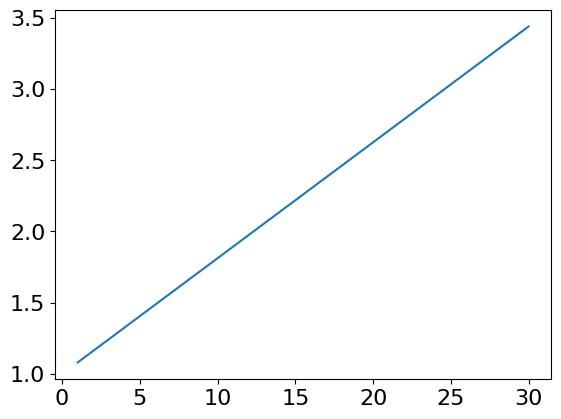

In [67]:
plt.plot(W10, tau_wind(W10) / (rho_a * 0.8e-3 * W10**2));